In [ ]:
!pip install imagehash

In [ ]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from PIL import Image
import cv2
from pathlib import Path
import imagehash
import itertools
import hashlib
import shutil
import gdown
from google.colab import files

In [ ]:
#move to directory

def move_to_directory(folderpath="/content/data_folder"):
  os.makedirs(folderpath, exist_ok=True)
  uploaded = files.upload()
  for filename in uploaded.keys():
      shutil.move(filename, os.path.join(folderpath, filename))

In [ ]:
def metadata_review(filename):
  print(filename, "\n", " ".join(["_" for i in range(20)]),"\n")
  df = pd.read_csv(filename)
  print(df.columns,"\n")
  print(df.describe(),"\n")
  print(df.info(), "\n")
  return df

def review_target_col(df, col):
  print(df[col].value_counts(), "\n")
  print( (100*df[col].value_counts(normalize=True) ).apply(lambda x: f'{x:.2f}%'), "\n")
  print(df[col].unique(), "\n")


In [ ]:
# kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"svetlanayu","key":"823b4d9905a7344e5829efa3ae2cb96a"}'}

# Data Sources

### PROVe-AI, https://api.isic-archive.com/collections/218/

In [ ]:
folder_path = "/content/PROVe-AI"
move_to_directory(folder_path)

Saving prove-ai_metadata_2025-02-19.csv to prove-ai_metadata_2025-02-19.csv


In [ ]:
!unzip -q -o "{folder_path}/ISIC-images.zip" -d {folder_path}

### ISIC 2024 Challenge Dataset
  https://api.isic-archive.com/collections/390/


In [ ]:
folder_path = "/content/2024"
os.makedirs(folder_path, exist_ok=True)

--2025-03-01 08:06:59--  https://isic-challenge-data.s3.amazonaws.com/2024/ISIC_2024_Training_Supplement.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 16.15.178.187, 52.216.152.204, 54.231.195.225, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|16.15.178.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41608235 (40M) [text/csv]
Saving to: ‘/content/2024/ISIC_2024_Training_Supplement.csv’

/content/2024/ISIC_ 100%[===================>]  39.68M  48.2MB/s    in 0.8s    

2025-03-01 08:07:00 (48.2 MB/s) - ‘/content/2024/ISIC_2024_Training_Supplement.csv’ saved [41608235/41608235]



In [ ]:
!wget -O "{folder_path}/ISIC_2024_Training_Supplement.csv" "https://isic-challenge-data.s3.amazonaws.com/2024/ISIC_2024_Training_Supplement.csv"
!wget -O "{folder_path}/ISIC_2024_Training_GroundTruth.csv" "https://isic-challenge-data.s3.amazonaws.com/2024/ISIC_2024_Training_GroundTruth.csv"}

In [ ]:
!wget -O "{folder_path}/ISIC_2024_Training_Input.zip" "https://isic-challenge-data.s3.amazonaws.com/2024/ISIC_2024_Training_Input.zip"
!unzip -q -o "{folder_path}/ISIC_2024_Training_Input.zip" -d {folder_path}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c isic-2024-challenge -p {folder_path}

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!unzip -qq -o "{folder_path}/isic-2024-challenge.zip" -d {folder_path}

###ISIC 2020

In [ ]:
folder_path = "/content/2020"
os.makedirs(folder_path, exist_ok=True)

In [ ]:
#metadata
folder_path = "/content/2020"
!wget -O "{folder_path}/ISIC_2020_Training_GroundTruth_v2.csv" "https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_GroundTruth_v2.csv"

!wget -O "{folder_path}/ISIC_2020_Training_Duplicates.csv" "https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_Duplicates.csv"

!wget -O "{folder_path}/ISIC_2020_Test_Metadata.csv" "https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Test_Metadata.csv"

--2025-04-22 09:54:04--  https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_GroundTruth_v2.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.201.65, 3.5.13.147, 52.216.40.89, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.201.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2387418 (2.3M) [text/csv]
Saving to: ‘/content/2020/ISIC_2020_Training_GroundTruth_v2.csv’

/content/2020/ISIC_ 100%[===================>]   2.28M  12.5MB/s    in 0.2s    

2025-04-22 09:54:04 (12.5 MB/s) - ‘/content/2020/ISIC_2020_Training_GroundTruth_v2.csv’ saved [2387418/2387418]



In [ ]:
#test labels
folderpath = "/content/2020"
move_to_directory(folderpath)

Saving challenge-2020-test_metadata.csv to challenge-2020-test_metadata.csv


In [ ]:
# folder_path = "/content/2020"
# !wget "{folder_path}/ISIC_2020_Training_JPEG.zip" https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_JPEG.zip
# !unzip -q -o "{folder_path}/ISIC_2020_Training_JPEG.zip" -d {folder_path}

In [ ]:
# folder_path = "/content/2020"
# !wget -O "{folder_path}/ISIC_2020_Test_JPEG.zip" https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Test_JPEG.zip
# !unzip -q -o "{folder_path}/ISIC_2020_Test_JPEG.zip" -d {folder_path}

In [ ]:
# 512x512 2020
# folderpath = "/content/2020"
# move_to_directory(folderpath)

load from kaggle 256x256

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir ~/.kaggle
!kaggle datasets download -d cdeotte/jpeg-melanoma-256x256 -p /content/2020

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/cdeotte/jpeg-melanoma-256x256
License(s): CC0-1.0


In [ ]:
!unzip -q -o "/content/2020/jpeg-melanoma-256x256.zip" -d /content/2020

###ISIC 2019

In [ ]:
folder_path = "/content/2019"
os.makedirs(folder_path, exist_ok=True)

In [ ]:
#metadata
folder_path = "/content/2019"
!wget -O "{folder_path}/ISIC_2019_Training_Metadata.csv" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv
!wget -O "{folder_path}/ISIC_2019_Training_GroundTruth.csv" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv
!wget -O "{folder_path}/ISIC_2019_Test_Metadata.csv" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Metadata.csv
!wget -O "{folder_path}/ISIC_2019_Test_GroundTruth.csv" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_GroundTruth.csv


--2025-04-22 09:39:57--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.193.57, 16.182.101.217, 16.15.194.103, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.193.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1291479 (1.2M) [text/csv]
Saving to: ‘/content/2019/ISIC_2019_Training_GroundTruth.csv’

/content/2019/ISIC_ 100%[===================>]   1.23M  7.55MB/s    in 0.2s    

2025-04-22 09:39:58 (7.55 MB/s) - ‘/content/2019/ISIC_2019_Training_GroundTruth.csv’ saved [1291479/1291479]

--2025-04-22 09:39:58--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.193.57, 16.182.101.217, 16.15.194.103, ...
Connecting to isic-challenge-data.s3.amazonaws.c

In [ ]:
# !wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip
# !unzip -q ISIC_2019_Training_Input.zip

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
folder_path = "/content/2019"
!wget -O "{folder_path}/ISIC_2019_Test_Input.zip" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Input.zip
!unzip -q -o "{folder_path}/ISIC_2019_Test_Input.zip" -d {folder_path}

In [ ]:
# 512x512 2019 train
# folderpath = "/content/2019"
# move_to_directory(folderpath)

load from kaggle train 2019 256x256

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
folder_path = "/content/2019"
os.makedirs(folder_path, exist_ok=True)
!kaggle datasets download -d "cdeotte/jpeg-isic2019-256x256" -p /content/2019
!unzip -q "/content/2019/jpeg-isic2019-256x256" -d /content/2019


Dataset URL: https://www.kaggle.com/datasets/cdeotte/jpeg-isic2019-256x256
License(s): CC0-1.0


###ISIC 2018

In [ ]:
folder_path = "/content/2018"
os.makedirs(folder_path, exist_ok=True)

In [ ]:
#metadata
folder_path = "/content/2018"
!wget -O "{folder_path}/ISIC2018_Task3_Training_LesionGroupings.csv" https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_LesionGroupings.csv
!wget -O "{folder_path}/ISIC2018_Task3_Training_GroundTruth.zip" https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip
!unzip -q -o "{folder_path}/ISIC2018_Task3_Training_GroundTruth.zip" -d {folder_path}
!wget -O "{folder_path}/ISIC2018_Task3_Validation_GroundTruth.zip" https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip
!unzip -q -o "{folder_path}/ISIC2018_Task3_Validation_GroundTruth.zip" -d {folder_path}
!wget -O "{folder_path}/ISIC2018_Task3_Test_GroundTruth.zip" https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_GroundTruth.zip
!unzip -q -o "{folder_path}/ISIC2018_Task3_Test_GroundTruth.zip" -d {folder_path}

--2025-03-03 19:28:59--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_LesionGroupings.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.140.65, 52.217.130.33, 3.5.29.89, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.140.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492996 (481K) [text/csv]
Saving to: ‘/content/2018/ISIC2018_Task3_Training_LesionGroupings.csv’

/content/2018/ISIC2 100%[===================>] 481.44K  --.-KB/s    in 0.1s    

2025-03-03 19:28:59 (3.62 MB/s) - ‘/content/2018/ISIC2018_Task3_Training_LesionGroupings.csv’ saved [492996/492996]

--2025-03-03 19:28:59--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.140.65, 52.217.130.33, 3.5.29.89, ...
Connecting to isic-challe

In [ ]:
!wget -O "{folder_path}/ISIC2018_Task3_Validation_Input.zip" https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip
!unzip -q -o "{folder_path}/ISIC2018_Task3_Validation_Input.zip" -d {folder_path}
!wget -O "{folder_path}/ISIC2018_Task3_Test_Input.zip" https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_Input.zip
!unzip -q -o "{folder_path}/ISIC2018_Task3_Test_Input.zip" -d {folder_path}
!wget -O "{folder_path}/ISIC2018_Task3_Training_Input.zip" https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_Input.zip
!unzip -q -o "{folder_path}/ISIC2018_Task3_Training_Input.zip" -d {folder_path}

--2025-03-03 19:29:07--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.2.122, 16.182.42.185, 16.182.35.233, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.5.2.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53292381 (51M) [application/zip]
Saving to: ‘/content/2018/ISIC2018_Task3_Validation_Input.zip’

/content/2018/ISIC2 100%[===================>]  50.82M  57.6MB/s    in 0.9s    

2025-03-03 19:29:08 (57.6 MB/s) - ‘/content/2018/ISIC2018_Task3_Validation_Input.zip’ saved [53292381/53292381]

--2025-03-03 19:29:09--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.2.122, 16.182.42.185, 16.182.35.233, ...
Connecting to isic-challenge-data.s3.amazonaws.com 

#Dataset ISIC 2024 review

In [ ]:
filenames = ["prove-ai_metadata_2025-02-19.csv", \
             "train-metadata.csv", \
             "challenge-2024-training_metadata_2025-02-19.csv", \
             "ISIC_2020_Training_GroundTruth_v2.csv"]

In [ ]:
dfs = []
df = metadata_review(filenames[1])
dfs = dfs.append(df)

<ipython-input-11-79ef760e4eb6>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [ ]:
df.head(5).T

,0,1,2,3,4
isic_id,ISIC_0015670,ISIC_0015845,ISIC_0015864,ISIC_0015902,ISIC_0024200
target,0,0,0,0,0
patient_id,IP_1235828,IP_8170065,IP_6724798,IP_4111386,IP_8313778
age_approx,60.0,60.0,60.0,65.0,55.0
sex,male,male,male,male,male
anatom_site_general,lower extremity,head/neck,posterior torso,anterior torso,anterior torso
clin_size_long_diam_mm,3.04,1.1,3.4,3.22,2.73
image_type,TBP tile: close-up,TBP tile: close-up,TBP tile: close-up,TBP tile: close-up,TBP tile: close-up
tbp_tile_type,3D: white,3D: white,3D: XP,3D: XP,3D: white
tbp_lv_A,20.244422,31.71257,22.57583,14.242329,24.72552


In [ ]:
df2=df[df.target == 1]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 387 to 400922
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   isic_id                       393 non-null    object 
 1   target                        393 non-null    int64  
 2   patient_id                    393 non-null    object 
 3   age_approx                    390 non-null    float64
 4   sex                           383 non-null    object 
 5   anatom_site_general           393 non-null    object 
 6   clin_size_long_diam_mm        393 non-null    float64
 7   image_type                    393 non-null    object 
 8   tbp_tile_type                 393 non-null    object 
 9   tbp_lv_A                      393 non-null    float64
 10  tbp_lv_Aext                   393 non-null    float64
 11  tbp_lv_B                      393 non-null    float64
 12  tbp_lv_Bext                   393 non-null    float64
 13  tbp_l

In [ ]:
df2["iddx_3"] = df2["iddx_3"].apply(lambda x: x.lower())
# photo with 'melanoma' (ISIC_0220459)
df2[df2["iddx_3"].str.contains("melanoma", regex=False)].isic_id

<ipython-input-20-517bc0658bf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["iddx_3"] = df2["iddx_3"].apply(lambda x: x.lower())


,isic_id
6057,ISIC_0220459
8204,ISIC_0275647
8347,ISIC_0279372
10041,ISIC_0321944
10400,ISIC_0330452
...,...
390561,ISIC_9735344
393359,ISIC_9805656
393958,ISIC_9821013
395305,ISIC_9855202


In [ ]:
print(df2[df2["isic_id"].isin(["ISIC_0321944"])].iddx_3)

10041    Melanoma in situ
Name: iddx_3, dtype: object


In [ ]:
with h5py.File("train-image.hdf5", "r") as f:
    print("Групи:", list(f.keys())[0:20])

Группы в файле: ['ISIC_0015670', 'ISIC_0015845', 'ISIC_0015864', 'ISIC_0015902', 'ISIC_0024200', 'ISIC_0035502', 'ISIC_0051648', 'ISIC_0051665', 'ISIC_0051710', 'ISIC_0051758', 'ISIC_0051812', 'ISIC_0051822', 'ISIC_0051896', 'ISIC_0051897', 'ISIC_0051958', 'ISIC_0051983', 'ISIC_0052003', 'ISIC_0052004', 'ISIC_0052026', 'ISIC_0052042']
тип данных: <class 'h5py._hl.base.KeysViewHDF5'>


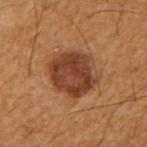

In [ ]:
# read file, select one groug, check if it is bytes format
from google.colab.patches import cv2_imshow

with h5py.File("train-image.hdf5", "r") as f:
  dset_name = "ISIC_0220459"
  if isinstance(f[dset_name], h5py.Dataset) and isinstance(f[dset_name][()], bytes):
    im_bytes = f[dset_name][()]
    im_array = np.frombuffer(im_bytes,dtype=np.uint8)
    image = cv2.imdecode(im_array, cv2.IMREAD_COLOR)
    # cv2.imshow("ISIC_0220459",image)
    cv2_imshow(image)

In [ ]:
files.upload()

#Datasets ISIC 2018-2020 review

In [ ]:
# folder_path = "/content/metadata"
# os.makedirs(folder_path, exist_ok=True)


In [ ]:
# change folder names
for old_folder, new_folder in [("2018/ISIC2018_Task3_Test_Input", "2018/test"), ("2018/ISIC2018_Task3_Training_Input", "2018/train"), ("2019/ISIC_2019_Test_Input", "2019/test")]:
  os.rename(old_folder, new_folder)
# os.rename("2019/ISIC_2019_Test_Input", "2019/test")

In [ ]:
# change file names
for folder_path in ["2019", "2020"]:
  for file in ["train.csv", "test.csv"]:
    old_fpath = os.path.join(folder_path, file)
    new_fpath = os.path.join(folder_path, file[:-4]+f"_{folder_path[-4:]}"+".csv")
    if os.path.exists(old_fpath):
      os.rename(old_fpath, new_fpath)
      print(f"Done.:{new_fpath}")
    else:
      print(f"File {old_fpath} not found")

Done.:2019/train_2019.csv
File 2019/test.csv not found
Done.:2020/train_2020.csv
Done.:2020/test_2020.csv


In [ ]:
# collect all metadata .csv files in one folder
metadata_path = "metadata"
os.makedirs(metadata_path, exist_ok=True)
for root, dirs, files in os.walk("/content"):
  for file in files:
    if file.endswith('.csv'):
      file_path = os.path.join(root, file)
      if 'sample_data' not in file_path.split(os.sep):
        dest_file = os.path.join(metadata_path, file)
        if os.path.exists(dest_file):
          continue
        shutil.copyfile(file_path, dest_file)
        print(f'File {file} copied to {metadata_path}.')

File challenge-2020-test_metadata.csv copied to metadata.
File ISIC_2020_Training_GroundTruth_v2.csv copied to metadata.
File sample_submission.csv copied to metadata.
File train_2020.csv copied to metadata.
File ISIC_2020_Training_Duplicates.csv copied to metadata.
File test_2020.csv copied to metadata.
File ISIC_2020_Test_Metadata.csv copied to metadata.
File ISIC2018_Task3_Training_LesionGroupings.csv copied to metadata.
File ISIC2018_Task3_Training_GroundTruth.csv copied to metadata.
File ISIC2018_Task3_Validation_GroundTruth.csv copied to metadata.
File ISIC2018_Task3_Test_GroundTruth.csv copied to metadata.
File ISIC_2019_Test_GroundTruth.csv copied to metadata.
File ISIC_2019_Training_Metadata.csv copied to metadata.
File ISIC_2019_Test_Metadata.csv copied to metadata.
File ISIC_2019_Training_GroundTruth.csv copied to metadata.
File train_2019.csv copied to metadata.
File prove-ai_metadata_2025-02-19.csv copied to metadata.


In [ ]:
for file in ["train_2020.csv", "test_2020.csv", "train_2019.csv", "sample_submission.csv" ]:
  os.remove(os.path.join(metadata_path, file))

In [ ]:
# metadata/ISIC_2020_Training_GroundTruth_v2.csv
# metadata/ISIC_2020_Test_Metadata.csv
# metadata/ISIC_2019_Test_Metadata.csv
# metadata/ISIC2018_Task3_Validation_GroundTruth.csv
# metadata/ISIC_2019_Test_GroundTruth.csv
# metadata/ISIC2018_Task3_Training_GroundTruth.csv
# metadata/ISIC2018_Task3_Test_GroundTruth.csv
# metadata/ISIC_2019_Training_Metadata.csv
# metadata/ISIC_2019_Training_GroundTruth.csv
# metadata/prove-ai_metadata_2025-02-19.csv
# metadata/ISIC2018_Task3_Training_LesionGroupings.csv
# metadata/ISIC_2020_Training_Duplicates.csv
# metadata/challenge-2020-test_metadata_2025-02-19.csv

In [ ]:
metadata_folder = Path("metadata")
print(type(dfs))
for file in metadata_folder.iterdir():
  if file.isfile() and file.suffix in ['.csv', '.xlsx']:
    metadata_review(file)


<class 'list'>
metadata/ISIC_2020_Training_GroundTruth_v2.csv 

Index(['image_name', 'patient_id', 'lesion_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object') 

         age_approx        target
count  33058.000000  33126.000000
mean      48.870016      0.017630
std       14.380360      0.131603
min        0.000000      0.000000
25%       40.000000      0.000000
50%       50.000000      0.000000
75%       60.000000      0.000000
max       90.000000      1.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   lesion_id                      33126 non-null  object 
 3   sex                            

In [ ]:
for file in metadata_folder.iterdir():
  if file.is_file() and file.suffix in ['.csv', '.xlsx']:
    df = pd.read_csv(file)
    print(file, "\n", " ".join(["_" for i in range(20)]),"\n",df.sample(3), "\n")


metadata/ISIC_2020_Training_GroundTruth_v2.csv 
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
          image_name  patient_id   lesion_id     sex  age_approx  \
7423   ISIC_2319929  IP_4050705  IL_8675249  female        40.0   
1391   ISIC_0520584  IP_3749901  IL_4555427  female        35.0   
12563  ISIC_3870647  IP_7279968  IL_2472462    male        45.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  
7423                          torso   unknown           benign       0  
1391                upper extremity     nevus           benign       0  
12563                         torso   unknown           benign       0   

metadata/ISIC_2020_Test_Metadata.csv 
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
              image     patient  age_approx anatom_site_general   sex
6787  ISIC_6151236  IP_5343120          30               torso  male
8321  ISIC_7551674  IP_5228625          55           head/neck  male
4747  ISIC_4379101  IP_2848061          85     upper extre

In [ ]:
target_cols = [('ISIC_2020_Training_GroundTruth_v2.csv', 'target'), \
 ('challenge-2020-test_metadata_2025-02-19.csv', 'diagnosis'), \
  ('ISIC_2019_Training_GroundTruth.csv', 'MEL'), \
  ('ISIC_2019_Test_GroundTruth.csv','MEL'), \
   ('ISIC2018_Task3_Training_GroundTruth.csv','MEL'),\
    ('ISIC2018_Task3_Validation_GroundTruth.csv', 'MEL'),\
     ('ISIC2018_Task3_Test_GroundTruth.csv', 'MEL'), \
     ('prove-ai_metadata_2025-02-19.csv', 'diagnosis')]

In [ ]:
for filename, col in target_cols:
  print(f'{filename}, {col}')
  df = pd.read_csv(metadata_folder/filename)
  # print(df[col].value_counts(normalize=True))
  print(review_target_col(df, col))

ISIC_2020_Training_GroundTruth_v2.csv, target
target
0    32542
1      584
Name: count, dtype: int64 

target
0    98.24%
1     1.76%
Name: proportion, dtype: object 

[0 1] 

None
challenge-2020-test_metadata_2025-02-19.csv, diagnosis
diagnosis
nevus                      3096
melanoma                    261
seborrheic keratosis         70
AIMP                         43
lentigo NOS                  29
solar lentigo                17
lentigo simplex              11
lichenoid keratosis           8
actinic keratosis             3
scar                          1
squamous cell carcinoma       1
Name: count, dtype: int64 

diagnosis
nevus                      87.46%
melanoma                    7.37%
seborrheic keratosis        1.98%
AIMP                        1.21%
lentigo NOS                 0.82%
solar lentigo               0.48%
lentigo simplex             0.31%
lichenoid keratosis         0.23%
actinic keratosis           0.08%
scar                        0.03%
squamous cell carcinoma 

#Duplicates

In [ ]:
# upload training dataset 2020 and duplicates file
from google.colab import files
files.upload()


{}

2020

In [ ]:
# !wget https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_Duplicates.csv

--2025-02-26 19:18:50--  https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_Duplicates.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.100.180, 3.5.29.140, 3.5.29.229, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.100.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11500 (11K) [text/csv]
Saving to: ‘ISIC_2020_Training_Duplicates.csv’

ISIC_2020_Training_ 100%[===================>]  11.23K  --.-KB/s    in 0s      

2025-02-26 19:18:51 (131 MB/s) - ‘ISIC_2020_Training_Duplicates.csv’ saved [11500/11500]



### пошук дублікатів, порівняння зі списком, що наданий у csv файлі з джерела даних.

In [ ]:
dupl_df = pd.read_csv("metadata/ISIC_2020_Training_Duplicates.csv")
dupl_arr = dupl_df.to_numpy().flatten()
np.random.shuffle(dupl_arr)
dupl_arr[0:2]

array(['ISIC_2645159', 'ISIC_3685955'], dtype=object)

In [ ]:
dupl_arr = np.char.add(dupl_arr.astype('str'), '.jpg')
dupl_arr[0:2]

array(['ISIC_2645159.jpg', 'ISIC_3685955.jpg'], dtype='<U16')

In [ ]:
# pick files in directory
def collect_filepathes(directory, files_to_find):
  files=[]
  for file in os.listdir(directory):
    if file in files_to_find:
      filepath = os.path.join(directory, file)
      if os.path.isfile(filepath):
        files.append(filepath)
  return files

In [ ]:
d_files = collect_filepathes(Path("2020/train"), dupl_arr)

In [ ]:
len(d_files)

850

In [ ]:
!pip install imagehash
import imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.1 MB/s eta 0:00:00


In [ ]:
def is_c_hash_function(hash_function):
  """Checks if a function belongs to hashlib"""
  try:
      return callable(hash_function) and hasattr(hash_function(b''), 'digest') and hasattr(hash_function(b''), 'hexdigest')
  except Exception:
      return False

def is_p_hash_function(hash_function):
  """Checks if a function belongs to imagehash"""
  try:
    test_img = Image.new('RGB', (5, 5))
    return callable(hash_function) and isinstance(hash_function(test_img), imagehash.ImageHash)
  except Exception:
      return False

def perceptual_hash(filepath, hash_function):
  """Read file using PIL and compute perceptual hash hex string"""
  with Image.open(filepath) as img:
    if img is not None:
      return str(hash_function(img))
    else:
      print(f'{filepath}: Unable to read image')
      return '0'

def crypto_hash(filepath, hash_function):
  """Read file as byte-like object and compute cryptographic hash as hex string"""
  hash_obj = hash_function() #call to create hash object
  with open(filepath, 'rb') as img:
    if img is not None:
      for chunk in iter(lambda: img.read(4096), b""):  # read 4Kb
        hash_obj.update(chunk)
    else:
      print(f'{filepath}: Unable to read image')
      return '0'
  return hash_obj.hexdigest()

def compute_hash_table(directory, method="c", hash_function=hashlib.md5):
  """computes hash table with perceptual or cryptographic hashes"""

  if (method == "p") and (not is_p_hash_function(hash_function)):
    print("This hash function is not available for computing perceptual hash")
    return
  if (method == "c") and (not is_c_hash_function(hash_function)):
    print("This hash function is not available for computing cryptographic hash")
    return
  if method not in ["p", "c"]:
    print(f'{method}: "Method is incorrect"')
    return

  call_hash_func = perceptual_hash if method == "p" else crypto_hash

  hashes = []
  for file in os.listdir(directory):
    filepath = os.path.join(directory, file)
    if os.path.isfile(filepath):
      try:
        hash = call_hash_func(filepath, hash_function)
        hashes.append( (file, int(hash, 16)) )
      except Exception as ex:
        print(f'{file}: {ex}')
        return
  df = pd.DataFrame(hashes, columns=['image','hash'])
  df.sort_values(by='hash', inplace=True, ignore_index=True)
  df['diff'] = df['hash'].diff()
  return df

def find_duplicates(hash_table):
  duplicates = hash_table[hash_table['diff']==0].copy()
  duplicate_pairs = []
  for i in duplicates.index:
    duplicate_pairs.append((hash_table.at[i-1, 'image'], hash_table.loc[i, 'image']))
  return duplicate_pairs

In [ ]:
hash_table_2020_ahash = compute_hash_table(Path("2020/train"), method="p", hash_function=imagehash.average_hash)
hash_table_2020_ahash.head(10)

,image,hash,diff
0,ISIC_6385793.jpg,9150463,NaN
1,ISIC_1259091.jpg,9437183,2.867200e+05
2,ISIC_1990771.jpg,11599615,2.162432e+06
3,ISIC_6300814.jpg,25292799,1.369318e+07
4,ISIC_9367522.jpg,1086849023,1.061556e+09
5,ISIC_5057452.jpg,2181038079,1.094189e+09
6,ISIC_9546788.jpg,3706716159,1.525678e+09
7,ISIC_3900239.jpg,4345758719,6.390426e+08
8,ISIC_9441123.jpg,7113539583,2.767781e+09
9,ISIC_6093890.jpg,12408823807,5.295284e+09


In [ ]:
hash_table_2020_ahash.describe()

,hash,diff
count,3.312600e+04,3.312500e+04
mean,9.317179e+18,5.568828e+14
std,7.019866e+18,5.672646e+15
min,9.150463e+06,0.000000e+00
25%,3.475793e+18,6.659248e+07
50%,8.970888e+18,3.206750e+10
75%,1.837441e+19,4.947800e+12
max,1.844674e+19,4.368613e+17


In [ ]:
dupl_pairs_2020_ahash = find_duplicates(hash_table_2020_ahash)
dupl_pairs_2020_ahash[:7]

[('ISIC_3757997.jpg', 'ISIC_6676883.jpg'),
 ('ISIC_4765961.jpg', 'ISIC_8829317.jpg'),
 ('ISIC_2526675.jpg', 'ISIC_7743266.jpg'),
 ('ISIC_1062359.jpg', 'ISIC_1514098.jpg'),
 ('ISIC_5119949.jpg', 'ISIC_4881602.jpg'),
 ('ISIC_2846882.jpg', 'ISIC_0919396.jpg'),
 ('ISIC_5854870.jpg', 'ISIC_0674662.jpg')]

In [ ]:
len(dupl_pairs_2020_ahash)

857

In [ ]:
for pair in dupl_pairs_2020_ahash[:4]:
  print(f"[{ hash_table_2020_ahash[hash_table_2020_ahash.image==pair[0]]['hash'] }, { hash_table_2020_ahash[hash_table_2020_ahash.image==pair[1]]['hash'] }]")

[41    31046154206748
Name: hash, dtype: uint64, 42    31046154206748
Name: hash, dtype: uint64]
[70    104315087699774
Name: hash, dtype: uint64, 71    104315087699774
Name: hash, dtype: uint64]
[104    253883838316316
Name: hash, dtype: uint64, 105    253883838316316
Name: hash, dtype: uint64]
[821    9146281024715800
Name: hash, dtype: uint64, 822    9146281024715800
Name: hash, dtype: uint64]


In [ ]:
def demo_duplicates(directory, pairs_list):
  n_pairs = len(pairs_list)
  plt.figure(figsize=(10, np.ceil(n_pairs/2)*2.5))
  demo_lst = list(itertools.chain(*[collect_filepathes(directory, p) for p in pairs_list]))
  for i, im in enumerate(demo_lst):
    im_bgr = cv2.imread(im)
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(int(np.ceil(n_pairs/2)), 4, i + 1)
    plt.imshow(im_rgb)
    plt.axis("off")

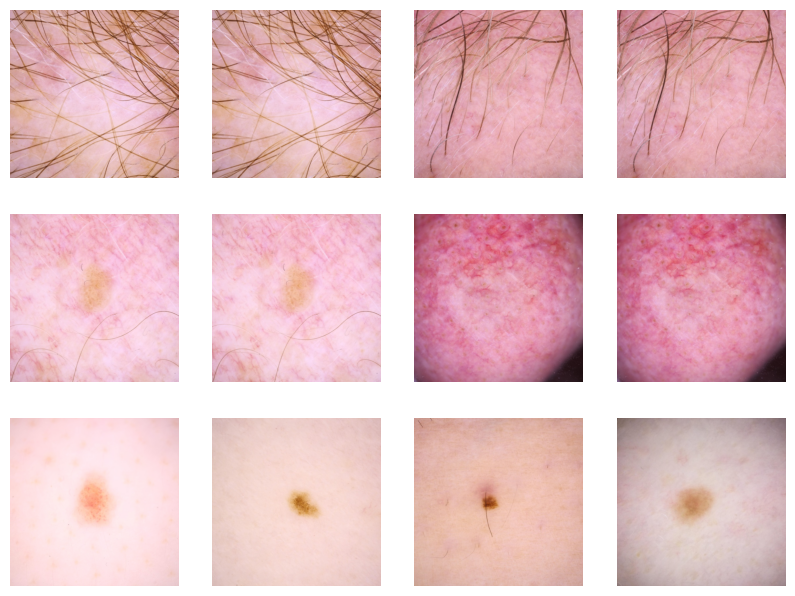

In [ ]:
directory = Path("2020/train")
pairs_list = dupl_pairs_2020_ahash[:6]
demo_duplicates(directory, pairs_list)

Серед пар є як дублікати, так і схожі зображення, але не дублікати. Необхідно використовувати більш точний метод.

In [ ]:
hash_table_2020_chash = compute_hash_table(Path("2020/train"), method="c", hash_function=hashlib.md5)
hash_table_2020_chash.head(10)

,image,hash,diff
0,ISIC_5357406.jpg,2915810929238564409989662117633209,NaN
1,ISIC_4054189.jpg,17432224178575426146026792738843545,14516413249336861736037130621210336
2,ISIC_1740186.jpg,33602177803217456470912356515837508,16169953624642030324885563776993963
3,ISIC_3410459.jpg,37952490410605908001260798247374579,4350312607388451530348441731537071
4,ISIC_1050950.jpg,38265561252380920070462135507708307,313070841775012069201337260333728
5,ISIC_3338629.jpg,42858741303386202700877210020651865,4593180051005282630415074512943558
6,ISIC_9598426.jpg,44041231787637456813310181092549024,1182490484251254112432971071897159
7,ISIC_3734674.jpg,69175085843884086916109513713068349,25133854056246630102799332620519325
8,ISIC_0335396.jpg,76828055237966237481111472749344936,7652969394082150565001959036276587
9,ISIC_5723176.jpg,89653220752849349367520762203733975,12825165514883111886409289454389039


In [ ]:
dupl_pairs_2020_chash = find_duplicates(hash_table_2020_chash)
dupl_pairs_2020_chash[:7]

[('ISIC_4226395.jpg', 'ISIC_8827615.jpg'),
 ('ISIC_8284364.jpg', 'ISIC_0292158.jpg'),
 ('ISIC_0367225.jpg', 'ISIC_8469351.jpg'),
 ('ISIC_0401116.jpg', 'ISIC_0467724.jpg'),
 ('ISIC_7803010.jpg', 'ISIC_7941047.jpg'),
 ('ISIC_5448850.jpg', 'ISIC_9881235.jpg'),
 ('ISIC_9391954.jpg', 'ISIC_0370932.jpg')]

In [ ]:
len(dupl_pairs_2020_chash)

433

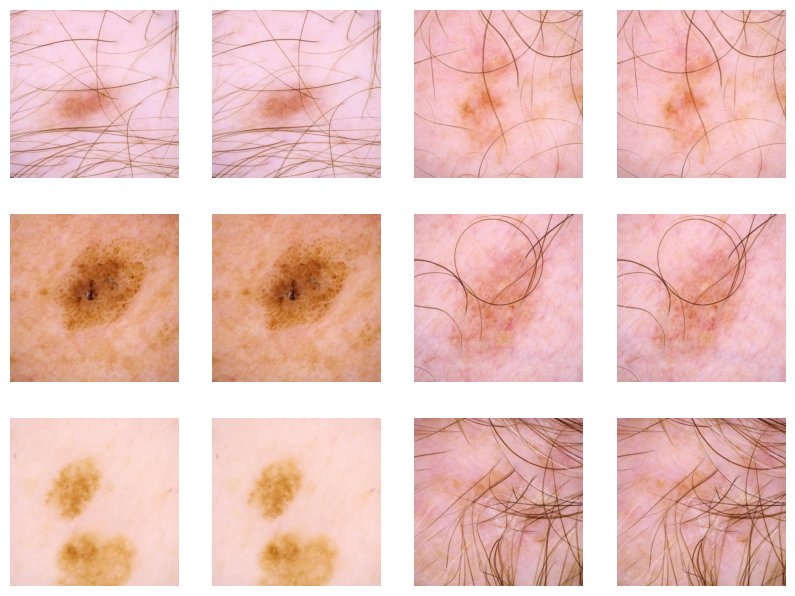

In [ ]:
directory = Path("2020/train")
pairs_list = dupl_pairs_2020_chash[:6]
demo_duplicates(directory, pairs_list)

За допомогою перцептивного хеша знайдено 857 пар, метод не можна використати для пошуку дублікатів, тільки для відбору схожих зображень.За допомогою криптографічного хеша знайдено 433 пари дублікатів, у наданому файлі 425 пар. Перевіримо, яких невистачає.

In [ ]:
dupl_chain = itertools.chain.from_iterable(dupl_pairs_2020_chash)
dupl_arr_detect = np.fromiter(dupl_chain, dtype='<U16')

In [ ]:
missing_images = dupl_arr_detect[~np.isin(dupl_arr_detect, dupl_arr)]
print(missing_images)

['ISIC_8776686.jpg' 'ISIC_1642492.jpg' 'ISIC_7607101.jpg'
 'ISIC_7675261.jpg' 'ISIC_8689583.jpg' 'ISIC_2074396.jpg'
 'ISIC_6705662.jpg' 'ISIC_5492174.jpg' 'ISIC_6450285.jpg'
 'ISIC_6548307.jpg' 'ISIC_8262759.jpg' 'ISIC_6284722.jpg'
 'ISIC_2718135.jpg' 'ISIC_9409255.jpg' 'ISIC_6063252.jpg'
 'ISIC_7195645.jpg']


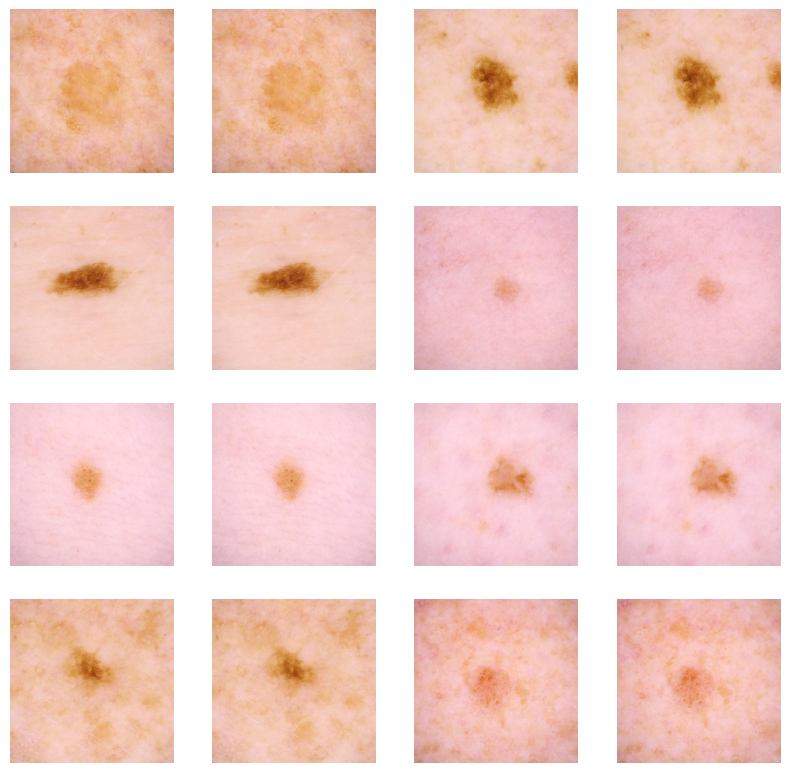

In [ ]:
directory = Path("2020/train")
pairs_list = missing_images
demo_duplicates(directory, pairs_list)

До списку дублікатів можна додати ще 8 пар зображень (доповнено файл "ISIC_2020_Training_Duplicates.csv").

### Видалення файлів-дублікатів з 2020/train

In [ ]:
# upload csv file with all duplicates
files.upload()
dupl_df = pd.read_csv("ISIC_2020_Training_Duplicates.csv")
dupl_df.head(3)


Saving ISIC_2020_Training_Duplicates.csv to ISIC_2020_Training_Duplicates.csv


,image_name_1,image_name_2
0,ISIC_0079038,ISIC_8521950
1,ISIC_0087297,ISIC_4755972
2,ISIC_0088137,ISIC_4201955


In [ ]:
dupl_arr = dupl_df['image_name_1'].to_numpy()
dupl_arr = np.char.add(dupl_arr.astype('str'), '.jpg')
d_files = collect_filepathes(Path("2020/train"), dupl_arr)
d_files[:3]

['2020/train/ISIC_4226395.jpg',
 '2020/train/ISIC_3385140.jpg',
 '2020/train/ISIC_1188141.jpg']

In [ ]:
def remove_files(files_to_find):
  for file in files_to_find:
    os.remove(file)

In [ ]:
remove_files(d_files)

In [ ]:
counter=0
for file in d_files:
  if not os.path.exists(file):
    counter +=1
print(counter)


433


### Видалення файлів-дублікатів з датасетів

In [ ]:
# make hash table, collect duplicates pairs, define the number of pais, plot examples, collect filepathes and remove duplicates

def duplicates_handling_pipeline(directory, method="c", hash_function=hashlib.md5, slice_len=6):
  """make hash table, collect duplicates pairs, define the number of pais,
     plot examples, collect filepathes and remove duplicates"""

  hash_table = compute_hash_table(Path(directory), method="c", hash_function=hashlib.md5)
  dupl_pairs = find_duplicates(hash_table)
  print(f"Number of duplicates pairs: {len(dupl_pairs)}")
  print(f"{dupl_pairs[:slice_len]}")
  demo_duplicates(directory, dupl_pairs[:slice_len])

  filename_to_save = "/content/" + directory.replace("/", "_") + "_dupl.csv"
  df = pd.DataFrame(dupl_pairs, columns=['image_name_1','image_name_2'])
  df.to_csv(filename_to_save, index=False)
  # with open(filename_to_save, mode="w", newline='') as file:
  #   writer = csv.writer(file)
  #   for row in dupl_pairs:
  #     writer.writerow(row)
  return dupl_pairs

def remove_duplicates(directory, dupl_pairs, slice_len=6):
  if len(dupl_pairs)>0:
    names_remove_arr = np.array(dupl_pairs)[:,1]
    d_files = collect_filepathes(directory, names_remove_arr)
    print(f"Examples to remove: {d_files[:5]}")
    remove_files(d_files)
    counter=0
    for file in d_files:
      if not os.path.exists(file):
        counter +=1
    print(f"Removed {counter} files")
  else:
    print(f"No duplicates in {directory}")

In [ ]:
# shutil.rmtree("/content/2018_new")
# shutil.rmtree("/content/2019_new")
# shutil.rmtree("/content/2020_new")

In [ ]:
dupl_pairs = duplicates_handling_pipeline("2020/train" , method="c", hash_function=hashlib.md5, slice_len=2)
remove_duplicates("2020/train", dupl_pairs)

Number of duplicates pairs: 0
[]
No duplicates in 2020/train


<Figure size 1000x0 with 0 Axes>

Number of duplicates pairs: 84
[('ISIC_9008728.jpg', 'ISIC_9982577.jpg'), ('ISIC_2862111.jpg', 'ISIC_3666478.jpg')]
Examples to remove: ['2020/test/ISIC_9174152.jpg', '2020/test/ISIC_7262158.jpg', '2020/test/ISIC_8166745.jpg', '2020/test/ISIC_1808187.jpg', '2020/test/ISIC_0762091.jpg']
Removed 84 files


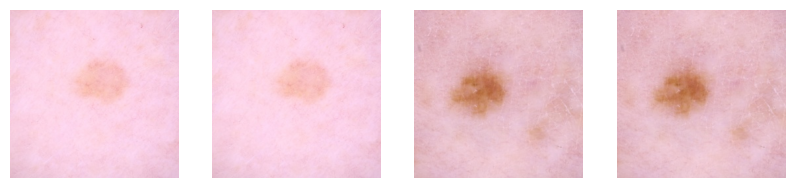

In [ ]:
dupl_pairs = duplicates_handling_pipeline("2020/test" , method="c", hash_function=hashlib.md5, slice_len=2)
remove_duplicates("2020/test", dupl_pairs)

Number of duplicates pairs: 50
[('ISIC_0055643.jpg', 'ISIC_0065417.jpg'), ('ISIC_0066634.jpg', 'ISIC_0067608.jpg')]
Examples to remove: ['2019/train/ISIC_0064300.jpg', '2019/train/ISIC_0061802.jpg', '2019/train/ISIC_0062983.jpg', '2019/train/ISIC_0054075.jpg', '2019/train/ISIC_0065140.jpg']
Removed 50 files


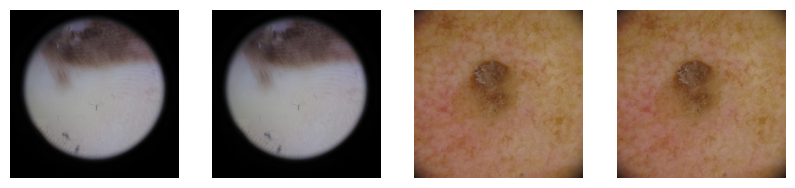

In [ ]:
dupl_pairs = duplicates_handling_pipeline("2019/train" , method="c", hash_function=hashlib.md5, slice_len=2)
remove_duplicates("2019/train", dupl_pairs)

In [ ]:
dupl_pairs = duplicates_handling_pipeline("2019/test" , method="c", hash_function=hashlib.md5, slice_len=2)
remove_duplicates("2019/test", dupl_pairs)


Number of duplicates pairs: 0
[]
No duplicates in 2019/test


<Figure size 1000x0 with 0 Axes>

Number of duplicates pairs: 2
[('ISIC_0029861.jpg', 'ISIC_0024366.jpg'), ('ISIC_0029938.jpg', 'ISIC_0024777.jpg')]
Examples to remove: ['2018/train/ISIC_0024366.jpg', '2018/train/ISIC_0024777.jpg']
Removed 2 files


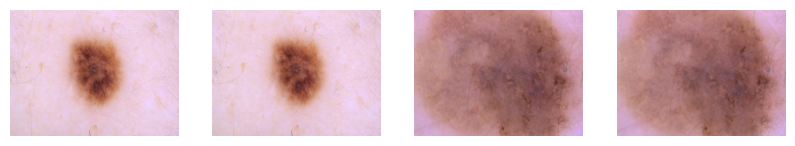

In [ ]:
dupl_pairs = duplicates_handling_pipeline("2018/train" , method="c", hash_function=hashlib.md5, slice_len=2)
remove_duplicates("2018/train", dupl_pairs)

In [ ]:
dupl_pairs = duplicates_handling_pipeline("2018/test" , method="c", hash_function=hashlib.md5, slice_len=2)
remove_duplicates("2018/test", dupl_pairs)

Number of duplicates pairs: 0
[]
No duplicates in 2018/test


<Figure size 1000x0 with 0 Axes>

### Порівняння датасетів 2018 та 2019 рр.

Набори за 2018 та 2019 роки містять файли з однаковими назвами, що відповідають однаковим зображенням. Порівняємо кількість дублікатів в наборах за ці роки для цільового класу по назвах, адже розмір файлів різний та пошук за хеш значенням не дасть результат.

In [ ]:
# shutil.rmtree("2020_new")
# shutil.rmtree("2018_new")
# shutil.rmtree("2019_new")
# shutil.rmtree("2019")
# shutil.rmtree("2020")
# shutil.rmtree("2018")
# shutil.rmtree("metadata")


FileNotFoundError: [Errno 2] No such file or directory: '/content/2019_new'

In [ ]:
metadata_path = Path("metadata")
os.listdir(metadata_path)

['prove-ai_metadata_2025-02-19.csv',
 'challenge-2020-test_metadata.csv',
 'ISIC_2020_Training_GroundTruth_v2.csv',
 'ISIC_2019_Test_GroundTruth.csv',
 'ISIC_2019_Training_Metadata.csv',
 'ISIC2018_Task3_Test_GroundTruth.csv',
 'ISIC_2020_Training_Duplicates.csv',
 'ISIC2018_Task3_Training_LesionGroupings.csv',
 'ISIC_2019_Test_Metadata.csv',
 'ISIC_2019_Training_GroundTruth.csv',
 'ISIC2018_Task3_Training_GroundTruth.csv',
 'ISIC_2020_Test_Metadata.csv',
 'ISIC2018_Task3_Validation_GroundTruth.csv']

In [ ]:
metadata_summary = [('ISIC_2020_Training_GroundTruth_v2.csv', 'image_name','target'), \
 ('challenge-2020-test_metadata.csv', 'isic_id','diagnosis'), \
  ('ISIC_2019_Training_GroundTruth.csv','image','MEL'), \
  ('ISIC_2019_Test_GroundTruth.csv','image', 'MEL'), \
   ('ISIC2018_Task3_Training_GroundTruth.csv','image', 'MEL'),\
    ('ISIC2018_Task3_Test_GroundTruth.csv', 'image', 'MEL'), \
    ('ISIC2018_Task3_Validation_GroundTruth.csv','image', 'MEL'),\
     ('prove-ai_metadata_2025-02-19.csv', 'isic_id','diagnosis')]
metadata_summary_df = pd.DataFrame(metadata_summary, columns=['filename','image_col','target_col_name'])
metadata_summary_df

,filename,image_col,target_col_name
0,ISIC_2020_Training_GroundTruth_v2.csv,image_name,target
1,challenge-2020-test_metadata.csv,isic_id,diagnosis
2,ISIC_2019_Training_GroundTruth.csv,image,MEL
3,ISIC_2019_Test_GroundTruth.csv,image,MEL
4,ISIC2018_Task3_Training_GroundTruth.csv,image,MEL
5,ISIC2018_Task3_Test_GroundTruth.csv,image,MEL
6,ISIC2018_Task3_Validation_GroundTruth.csv,image,MEL
7,prove-ai_metadata_2025-02-19.csv,isic_id,diagnosis


In [ ]:
# get list of files with target class
def find_target_class_fnames(metadata_path, row):
  df = pd.read_csv(f'{metadata_path}/{row["filename"]}')
  df[row["image_col"]]=df[row["image_col"]].apply(lambda x: x+".jpg")
  targ_col_mask = df[row["target_col_name"]].isin([1, "melanoma"])
  target_im = df[targ_col_mask][row["image_col"]]
  return target_im.tolist()

In [ ]:
target_train_2019 = np.array(find_target_class_fnames(metadata_path, metadata_summary_df.iloc[2]))
target_test_2019 = np.array(find_target_class_fnames(metadata_path, metadata_summary_df.iloc[3]))
target_train_2018 = np.array(find_target_class_fnames(metadata_path, metadata_summary_df.iloc[4]))
target_test_2018 = np.array(find_target_class_fnames(metadata_path, metadata_summary_df.iloc[5]))
target_valid_2018 = np.array(find_target_class_fnames(metadata_path, metadata_summary_df.iloc[6]))

In [ ]:
print(f"target_train_2019: {len(target_train_2019)}")
print(f"target_test_2019: {len(target_test_2019)}")
print(f"target_train_2018: {len(target_train_2018)}")
print(f"target_test_2018: {len(target_test_2018)}")
print(f"target_valid_2018: {len(target_valid_2018)}")

target_train_2019: 4522
target_test_2019: 1327
target_train_2018: 1113
target_test_2018: 171
target_valid_2018: 21


In [ ]:
intersection_train = np.intersect1d(target_train_2019, target_train_2018)
len(intersection_train)

1113

In [ ]:
intersection_test = np.intersect1d(target_test_2019, target_test_2018)
len(intersection_test)

171

In [ ]:
intersection_valid = np.intersect1d(target_train_2019, target_valid_2018)
len(intersection_valid)

0

In [ ]:
intersection_valid2 = np.intersect1d(target_test_2019, target_valid_2018)
len(intersection_valid2)

21

Всі зображення цільового класу 2018 року присутні у датасеті 2019 року, тому для збагачення даних, що відповідають класу "меланома" можна використати тільки набор 2019 року.

## Розділення зображень по класах

In [ ]:
# copy target class files to separate directory
def separate_dataset_classes(source_dir, dest_dir, files_to_find):
  classes = ["melanoma", "other"]
  for cl in classes:
    sub_dir = f"{dest_dir}/{cl}"
    if not os.path.exists(sub_dir):
      os.makedirs(sub_dir)
  for filename in os.listdir(source_dir):
    # filepath = os.path.join(source_dir, file)
    if filename.endswith(('.jpg', '.jpeg', ".png") ):
      if filename in files_to_find:
        shutil.copyfile(f"{source_dir}/{filename}", f"{dest_dir}/{classes[0]}/{filename}")
      else:
        shutil.copyfile(f"{source_dir}/{filename}", f"{dest_dir}/{classes[1]}/{filename}")

# def move_files(source_dir, dest_dir):
#     os.makedirs(dest_dir, exist_ok=True)
#     shutil.move(source_dir+"/*", dest_dir+"/")

In [ ]:
year = ['2020', '2019']
fold = ['train', 'test']
i=0
for y in year:
  for f in fold:
    source_dir = y + "/" + f
    dest_dir = y + "_new/" + f
    metadata_file_params = metadata_summary_df.iloc[i]
    i+=1
    files_to_find = find_target_class_fnames(metadata_path, metadata_file_params)
    print(y, f, len(files_to_find))
    separate_dataset_classes(source_dir, dest_dir, files_to_find)


2020 train 584
2020 test 261
2019 train 4522
2019 test 1327


In [ ]:
year = ['2020_new', '2019_new']
fold = ['train', 'test']
classes = ["melanoma", "other"]
for y in year:
  for f in fold:
    for cl in classes:
      print( f'{y}/{f}/{cl}', len(os.listdir(y + "/" + f + "/" + cl)))

2020_new/train/melanoma 581
2020_new/train/other 32112
2020_new/test/melanoma 260
2020_new/test/other 10638
2019_new/train/melanoma 4512
2019_new/train/other 20769
2019_new/test/melanoma 1327
2019_new/test/other 6911


3 екземпляри цільового класу були видалені з train датасету та 1 з test датасету 2020р. як дублікати. За 2019 рік 9 та 0 відповідно.
Для формування більш збалансованого набору даних на основі датасету 2020 року необхідно додати зображення цільового класу з набору зображень попереднього року. Для уникнення об'єднання декількох дублікатів спочатку перевіримо наявність дублікатів у цільововму класі для кожного року.

In [ ]:
# move_files("2019_new/train/melanoma", "2020_new/train/melanoma" )

Збереження папок з цільовим класом

In [ ]:
!zip -q -r 2019_train_melanoma.zip /content/2019_new/train/melanoma
from google.colab import files
files.download("2019_train_melanoma.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -q -r 2020_train_melanoma.zip /content/2020_new/train/melanoma
# from google.colab import files
files.download("2020_train_melanoma.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !zip -q -r 2018_train_melanoma.zip /content/2018_new/train/melanoma
# # from google.colab import files
# files.download("2018_train_melanoma.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -q -r 2019_test_melanoma.zip /content/2019_new/test/melanoma
# from google.colab import files
files.download("2019_test_melanoma.zip")
!zip -q -r 2020_test_melanoma.zip /content/2020_new/test/melanoma
files.download("2020_test_melanoma.zip")
# !zip -q -r 2018_test_melanoma.zip /content/2018_new/test/melanoma
# files.download("2018_test_melanoma.zip")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Об'єднаємо дані з цільового класу для наборів за 2020 та 2019 роки та знову перевіримо наявність дублікатів.

In [ ]:
!mv /content/2019_new/test/melanoma/* /content/2020_new/test/melanoma/
!mv /content/2019_new/train/melanoma/* /content/2020_new/train/melanoma/

In [ ]:
year = ['2020_new', '2019_new']
fold = ['train', 'test']
cl = "melanoma"
for y in year:
  for f in fold:
    print( f'{y}/{f}/{cl}', len(os.listdir(y + "/" + f + "/" + cl)))

2020_new/train/melanoma 5093
2020_new/test/melanoma 1587
2019_new/train/melanoma 0
2019_new/test/melanoma 0


In [ ]:
dupl_pairs_train_mel = duplicates_handling_pipeline("2020_new/train/melanoma" , method="c", hash_function=hashlib.md5, slice_len=6)

Number of duplicates pairs: 0
[]


<Figure size 1000x0 with 0 Axes>

In [ ]:
dupl_pairs_train_mel = duplicates_handling_pipeline("2020_new/test/melanoma" , method="c", hash_function=hashlib.md5, slice_len=6)

Number of duplicates pairs: 0
[]


<Figure size 1000x0 with 0 Axes>

In [ ]:
year = '2020_new'
fold = ['train', 'test']
classes = ["melanoma", "other"]
for f in fold:
  for cl in classes:
    print( f'{year}/{f}/{cl}', len(os.listdir(year + "/" + f + "/" + cl)))

2020_new/train/melanoma 5093
2020_new/train/other 32112
2020_new/test/melanoma 1587
2020_new/test/other 10638


Немає дублікатів у об'єднаному датасеті класу "меланома". Для навчання буде використано набір 2020 року розміром 256x256 з доданими зображеннями цільового класу за 2019 рік, очищений від дублікатів. В тренувальному наборі 32112+5093 зображень, у тестовому 10638+1587.

In [ ]:
!zip -q -r 2020_supplemented.zip /content/2020_new
# from google.colab import files
files.download("2020_supplemented.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame(target_train_2019, columns=["image_name"]).to_csv("mel_train_2019.csv", index=False)
pd.DataFrame(target_test_2019, columns=["image_name"]).to_csv("mel_test_2019.csv", index=False)

In [ ]:
# !zip -q -r 2020_train_melanoma_full.zip /content/2020_new/train/melanoma
# # from google.colab import files
# files.download("2020_train_melanoma_full.zip")
# !zip -q -r 2020_test_melanoma_full.zip /content/2020_new/test/melanoma
# files.download("2020_test_melanoma_full.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



zip error: Interrupted (aborting)


FileNotFoundError: Cannot find file: 2020_test_melanoma_full.zip